[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-aps.ipynb)

### Adaptive Prediction Sets

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

!pip install -U --no-cache-dir gdown --pre

## [Click this link](https://github.com/aangelopoulos/conformal-prediction/blob/main/notebooks/imagenet-raps.ipynb) for a version of APS with much-improved practical performance.

In [2]:
# Load cached data
if not os.path.exists("../data"):
    os.system("gdown 1h7S6N_Rx7gdfO3ZunzErZy6H7620EbZK -O ../data.tar.gz")
    os.system("tar -xf ../data.tar.gz -C ../")
    os.system("rm ../data.tar.gz")
if not os.path.exists("../data/imagenet/human_readable_labels.json"):
    !wget -nv -O ../data/imagenet/human_readable_labels.json -L https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json

data = np.load("../data/imagenet/imagenet-resnet152.npz")
example_paths = os.listdir("../data/imagenet/examples")
smx = data["smx"]
labels = data["labels"].astype(int)

In [3]:
# Problem setup
n = 1000  # number of calibration points
alpha = 0.1  # 1-alpha is the desired coverage

In [4]:
# Split the softmax scores into calibration and validation sets (save the shuffling)
idx = np.array([1] * n + [0] * (smx.shape[0] - n)) > 0
np.random.shuffle(idx)
cal_smx, val_smx = smx[idx, :], smx[~idx, :]
cal_labels, val_labels = labels[idx], labels[~idx]

### Conformal prediction happens here

In [5]:
# Get scores. calib_X.shape[0] == calib_Y.shape[0] == n
cal_pi = cal_smx.argsort(1)[:, ::-1]
cal_srt = np.take_along_axis(cal_smx, cal_pi, axis=1).cumsum(axis=1)
cal_scores = np.take_along_axis(cal_srt, cal_pi.argsort(axis=1), axis=1)[
    range(n), cal_labels
]
# Get the score quantile
qhat = np.quantile(
    cal_scores, np.ceil((n + 1) * (1 - alpha)) / n, interpolation="higher"
)
# Deploy (output=list of length n, each element is tensor of classes)
val_pi = val_smx.argsort(1)[:, ::-1]
val_srt = np.take_along_axis(val_smx, val_pi, axis=1).cumsum(axis=1)
prediction_sets = np.take_along_axis(val_srt <= qhat, val_pi.argsort(axis=1), axis=1)

In [6]:
# Calculate empirical coverage
empirical_coverage = prediction_sets[
    np.arange(prediction_sets.shape[0]), val_labels
].mean()
print(f"The empirical coverage is: {empirical_coverage}")

The empirical coverage is: 0.8985510204081633


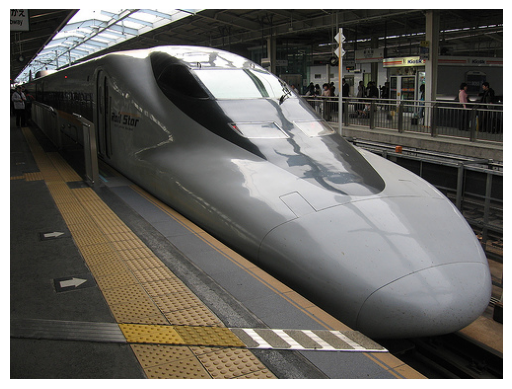

The prediction set is: [np.str_('airliner'), np.str_('bobsleigh'), np.str_('high-speed train'), np.str_('electric locomotive'), np.str_('limousine'), np.str_('missile'), np.str_('passenger car'), np.str_('projectile'), np.str_('sports car'), np.str_('tram'), np.str_('submarine'), np.str_('military aircraft'), np.str_('wing')]


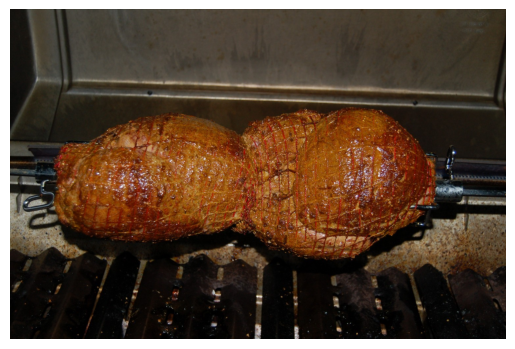

The prediction set is: [np.str_('electric ray'), np.str_('tailed frog'), np.str_('loggerhead sea turtle'), np.str_('mud turtle'), np.str_('terrapin'), np.str_('Gila monster'), np.str_('Nile crocodile'), np.str_('American alligator'), np.str_('triceratops'), np.str_('trilobite'), np.str_('harvestman'), np.str_('platypus'), np.str_('conch'), np.str_('snail'), np.str_('slug'), np.str_('chiton'), np.str_('American lobster'), np.str_('spiny lobster'), np.str_('crayfish'), np.str_('isopod'), np.str_('ground beetle'), np.str_('longhorn beetle'), np.str_('leaf beetle'), np.str_('rhinoceros beetle'), np.str_('weevil'), np.str_('ant'), np.str_('stick insect'), np.str_('cockroach'), np.str_('sea urchin'), np.str_('sea cucumber'), np.str_('beaver'), np.str_('pig'), np.str_('hippopotamus'), np.str_('armadillo'), np.str_('abacus'), np.str_('bakery'), np.str_('barometer'), np.str_('barrel'), np.str_('bookcase'), np.str_('bow'), np.str_('bow tie'), np.str_('broom'), np.str_('butcher shop'), np.str_('c

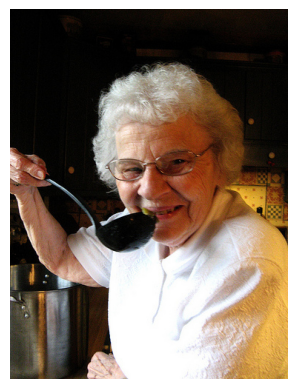

The prediction set is: [np.str_('stingray'), np.str_('ring-necked snake'), np.str_('night snake'), np.str_('wallaby'), np.str_('koala'), np.str_('snail'), np.str_('Dungeness crab'), np.str_('American lobster'), np.str_('crayfish'), np.str_('Soft-coated Wheaten Terrier'), np.str_('Irish Water Spaniel'), np.str_('Toy Poodle'), np.str_('Miniature Poodle'), np.str_('Standard Poodle'), np.str_('Siamese cat'), np.str_('rhinoceros beetle'), np.str_('ant'), np.str_('cockroach'), np.str_('howler monkey'), np.str_("Geoffroy's spider monkey"), np.str_('abacus'), np.str_('accordion'), np.str_('acoustic guitar'), np.str_('analog clock'), np.str_('apiary'), np.str_('apron'), np.str_('bakery'), np.str_('banjo'), np.str_('barber chair'), np.str_('barbershop'), np.str_('barometer'), np.str_('wheelbarrow'), np.str_('bassoon'), np.str_('bath towel'), np.str_('beaker'), np.str_('beer bottle'), np.str_('beer glass'), np.str_('bib'), np.str_('binoculars'), np.str_('bolo tie'), np.str_('poke bonnet'), np.str

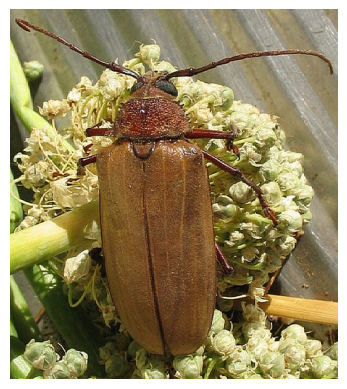

The prediction set is: [np.str_('longhorn beetle'), np.str_('leaf beetle'), np.str_('cockroach')]


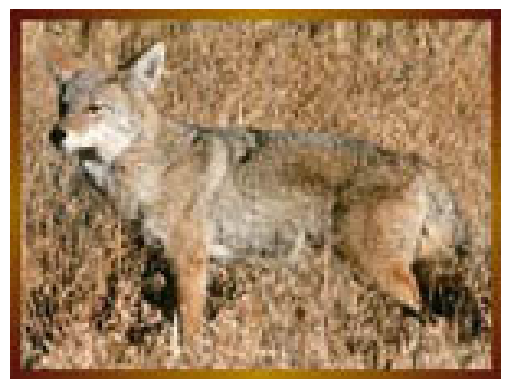

The prediction set is: [np.str_('toy terrier'), np.str_('Redbone Coonhound'), np.str_('Norwegian Elkhound'), np.str_('Otterhound'), np.str_('Border Terrier'), np.str_('Malinois'), np.str_('Australian Kelpie'), np.str_('German Shepherd Dog'), np.str_('husky'), np.str_('Siberian Husky'), np.str_('Griffon Bruxellois'), np.str_('Cardigan Welsh Corgi'), np.str_('grey wolf'), np.str_('Alaskan tundra wolf'), np.str_('red wolf'), np.str_('coyote'), np.str_('dingo'), np.str_('dhole'), np.str_('African wild dog'), np.str_('red fox'), np.str_('kit fox'), np.str_('Arctic fox'), np.str_('grey fox'), np.str_('Egyptian Mau'), np.str_('cougar'), np.str_('lynx'), np.str_('mongoose'), np.str_('cottontail rabbit'), np.str_('hare'), np.str_('fox squirrel'), np.str_('gazelle'), np.str_('weasel'), np.str_('black-footed ferret'), np.str_('mousetrap'), np.str_('muzzle')]


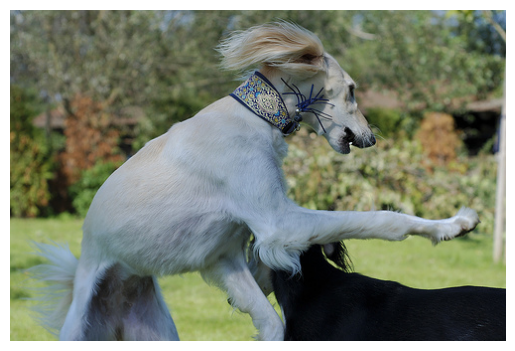

The prediction set is: [np.str_('borzoi'), np.str_('Whippet'), np.str_('Saluki')]


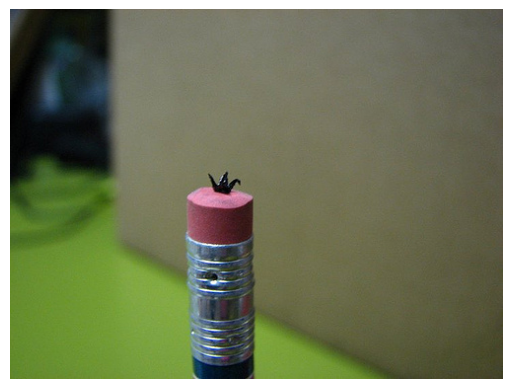

The prediction set is: [np.str_('tick'), np.str_('fly'), np.str_('bee'), np.str_('ballpoint pen'), np.str_('Band-Aid'), np.str_('ring binder'), np.str_('candle'), np.str_('coil'), np.str_('hourglass'), np.str_('lipstick'), np.str_('match'), np.str_('nail'), np.str_('pencil sharpener'), np.str_('perfume'), np.str_('plunger'), np.str_('pole'), np.str_('eraser'), np.str_('ruler'), np.str_('salt shaker'), np.str_('screw'), np.str_('spotlight'), np.str_('switch'), np.str_('tennis ball'), np.str_('whistle')]


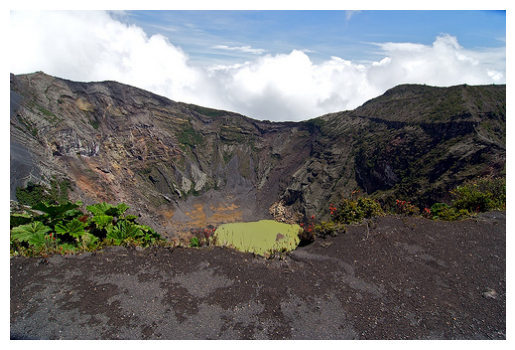

The prediction set is: [np.str_('tench'), np.str_('goldfish'), np.str_('great white shark'), np.str_('tiger shark'), np.str_('hammerhead shark'), np.str_('electric ray'), np.str_('stingray'), np.str_('cock'), np.str_('ostrich'), np.str_('junco'), np.str_('American dipper'), np.str_('bald eagle'), np.str_('vulture'), np.str_('fire salamander'), np.str_('newt'), np.str_('spotted salamander'), np.str_('American bullfrog'), np.str_('tree frog'), np.str_('loggerhead sea turtle'), np.str_('leatherback sea turtle'), np.str_('mud turtle'), np.str_('terrapin'), np.str_('box turtle'), np.str_('banded gecko'), np.str_('green iguana'), np.str_('Carolina anole'), np.str_('agama'), np.str_('frilled-necked lizard'), np.str_('alligator lizard'), np.str_('Gila monster'), np.str_('European green lizard'), np.str_('Komodo dragon'), np.str_('Nile crocodile'), np.str_('American alligator'), np.str_('triceratops'), np.str_('ring-necked snake'), np.str_('eastern hog-nosed snake'), np.str_('smooth green snake

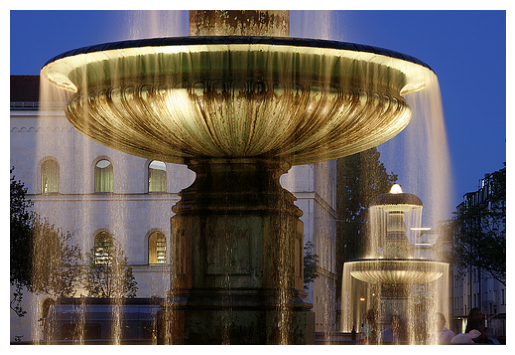

The prediction set is: [np.str_('airship'), np.str_('altar'), np.str_('analog clock'), np.str_('balloon'), np.str_('baluster'), np.str_('barometer'), np.str_('barrel'), np.str_('bathtub'), np.str_('lighthouse'), np.str_('beaker'), np.str_('beer glass'), np.str_('boathouse'), np.str_('breakwater'), np.str_('cauldron'), np.str_('candle'), np.str_('carousel'), np.str_('castle'), np.str_('chime'), np.str_('china cabinet'), np.str_('church'), np.str_('movie theater'), np.str_('coffee mug'), np.str_('coffeemaker'), np.str_('coil'), np.str_('dam'), np.str_('digital clock'), np.str_('dining table'), np.str_('dock'), np.str_('dome'), np.str_('drum'), np.str_('fire screen sheet'), np.str_('flagpole'), np.str_('fountain'), np.str_('goblet'), np.str_('greenhouse'), np.str_('hourglass'), np.str_('lampshade'), np.str_('library'), np.str_('ocean liner'), np.str_('mixing bowl'), np.str_('monastery'), np.str_('mortar'), np.str_('mosque'), np.str_('obelisk'), np.str_('palace'), np.str_('patio'), np.str_

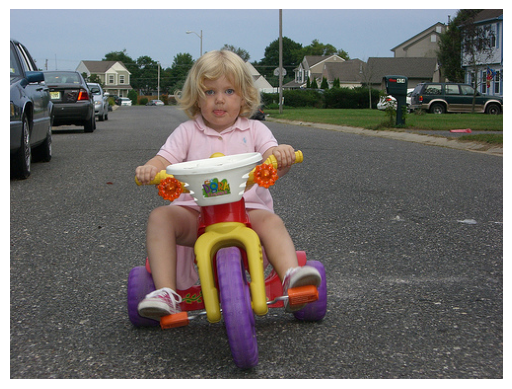

The prediction set is: []


In [7]:
# Show some examples
with open("../data/imagenet/human_readable_labels.json") as f:
    label_strings = np.array(json.load(f))

example_paths = os.listdir("../data/imagenet/examples")
for i in range(10):
    rand_path = np.random.choice(example_paths)
    img = imread("../data/imagenet/examples/" + rand_path)
    img_index = int(rand_path.split(".")[0])
    img_pi = smx[img_index].argsort()[::-1]
    img_srt = np.take_along_axis(smx[img_index], img_pi, axis=0).cumsum()
    prediction_set = np.take_along_axis(img_srt <= qhat, img_pi.argsort(), axis=0)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    print(f"The prediction set is: {list(label_strings[prediction_set])}")

This method was first introduced in https://arxiv.org/abs/2006.02544 and studied further for image classifiers in https://arxiv.org/abs/2009.14193.